<a href="https://colab.research.google.com/github/avishek-astra/Deep-Learning/blob/main/multivariate_regression_slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-14-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


A function that creates and trains the model


In [23]:
def buildAndTrainTheModel(x,y):
  #building a nn model
  ANNreg=nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
    )
  LearningRate=0.05
  #loss function
  lossfun=nn.MSELoss()
  #optimizer (the flavour of gradient descent to implement)
  optimizer=torch.optim.SGD(ANNreg.parameters(),lr=LearningRate)
  #train the model
  numepochs=500
  losses=torch.zeros(numepochs)
  #Train the model
  for epochi in range(numepochs):
    #forward pass
    yHat=ANNreg(x)
    #compute loss
    loss=lossfun(yHat,y)
    losses[epochi]=loss.item()
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #end training loop
    ###comput model predictions
    predictions=ANNreg(x)
    #output
  return predictions, losses



A function that creates the data

In [24]:
def createTheData(m):
    # Data creation
    N = 50
    x = torch.randn(N, 1)
    y = m * x + torch.randn(N, 1) / 2
    return x, y

Now for the experiment!

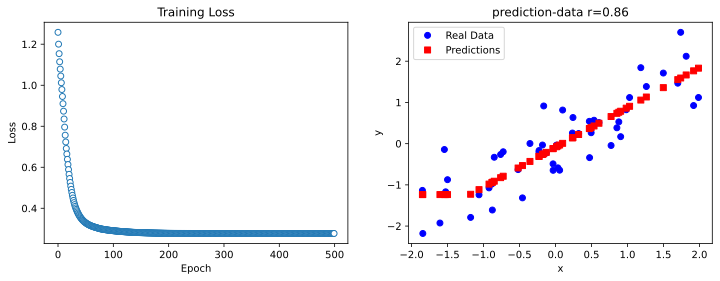

In [28]:
#run the model
x,y=createTheData(0.8)
#run the model
yHat,losses=buildAndTrainTheModel(x,y)
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')
ax[1].plot(x,y,'bo',label='Real Data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()
plt.show()


Main experiment


In [29]:
#MULTIPLE SLOPE TAKEN
slopes=np.linspace(-2,2,21)
numExps=50
#initialize output matrix
results=np.zeros((len(slopes),numExps,2))
for slopei in range(len(slopes)):
  for N in range(numExps):
    #create a dataset and run the model
    x,y=createTheData(slopes[slopei])
    yHat,losses=buildAndTrainTheModel(x,y)
    #store the final loss and performance
    results[slopei,N, 0]=losses[-1]
    results[slopei,N, 1]=np.corrcoef(y.T,yHat.detach().T)[0,1]
#correlation can be 0 if the model didn't do well. set nan's s--->0
results[np.isnan(results)]=0


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


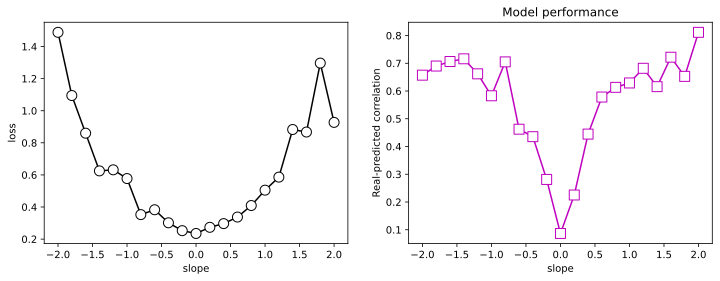

In [30]:
#plot the results
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('slope')
ax[0].set_ylabel("loss")
ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('slope')
ax[1].set_ylabel("Real-predicted correlation")
ax[1].set_title('Model performance')
plt.show()